In [1]:
import pycisTopic
pycisTopic.__version__

'0.1.dev300+g7494158'

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import pickle
import pandas as pd

In [4]:
import os
wdir = '/user/leuven/330/vsc33042/fderop/data/20211024_merged_analysis/'
os.chdir( wdir )

In [5]:
import glob
from collections import OrderedDict

# open cto

In [6]:
# load objects into dict:
f_cto_dir = 'ctos'
key = 'libds_merged'
cistopic_obj_dict = {}
f_out = os.path.join(wdir, f_cto_dir, key + '__cistopic_obj.pkl')
infile = open(f_out, 'rb')
tmp_cto = pickle.load(infile)
infile.close()
cistopic_obj_dict[key] = tmp_cto
print(f"Loaded {key}")

Loaded libds_merged


### Read in LDA/mallett models

In [8]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

In [9]:
f_mod_dir = 'models__screen__mallet'
n_iter = 200
models_dict = {}
for key in ['libds_merged']:
    f_mod =os.path.join(wdir, f_mod_dir, key + '__models_' + str(n_iter) + '_iter.pkl')
    if(os.path.isfile(f_mod)):
        with open(f_mod, 'rb') as f:
            models_dict[key] = pickle.load(f)
        print(f"Loaded {key}")

Loaded libds_merged


In [10]:
for key in models_dict.keys():
    model=evaluate_models(models_dict[key],
                         select_model=50, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot=False, # disabled since we only test one model here
                         plot_metrics=False
                         )
    cistopic_obj_dict[key].add_LDA_model(model)

# load metadata from the single samples
such as seurat cell type. this was written in notebook 5a

In [18]:
cistopic_obj_dict[key].cell_data

,Total_nr_frag,cisTopic_log_nr_acc,cisTopic_log_nr_frag,Unique_nr_frag,Unique_nr_frag_in_regions,FRIP,Dupl_nr_frag,cisTopic_nr_acc,Doublet_scores_fragments,cisTopic_nr_frag,...,barcode,TSS_enrichment,sample_id,Total_nr_frag_in_regions,fmx_droplet_type,fmx_sample,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_0.8,pycisTopic_leiden_10_1.0,pycisTopic_leiden_10_1.2
GAGGACATCTGAACTCCTTAA_TGGACCAGTAATACACCTACC_CTCTTGCCAGGCGGGTCGGTT_GCGACTCTCGGATGGGTAACA-Broad_1,43128,3.992067,4.034789,13806,7527,0.545198,29322,9819,0.098634,10834,...,GAGGACATCTGAACTCCTTAA_TGGACCAGTAATACACCTACC_CT...,19.625261,Broad_1,24899,SNG,sampleA,0,0,14,13
CGGATCTCGGCCAGGGCGGAA_TTTGGTCGATCACCTCATACA_CGGAGGAGTAATACAATGGCC-Broad_1,40183,4.120508,4.163996,13538,10611,0.783794,26645,13198,0.048705,14588,...,CGGATCTCGGCCAGGGCGGAA_TTTGGTCGATCACCTCATACA_CG...,23.376526,Broad_1,32467,SNG,sampleB,13,8,31,32
CTTGCGACGACACTATAGGCA_TCTTGTAGTTGATGCATACGC_AAGTTATCCTCCTTACTACGA-Broad_1,25367,3.853211,3.893318,8235,6620,0.803886,17132,7132,0.033989,7822,...,CTTGCGACGACACTATAGGCA_TCTTGTAGTTGATGCATACGC_AA...,23.913127,Broad_1,21308,SNG,sampleA,13,8,31,32
TACCGAATGACCGCATTCGTT_CTCATTTACTCAATAGCAACG_TGTCGCTCGATTACCACATGA-Broad_1,25177,3.845656,3.897077,7625,5874,0.770361,17552,7009,0.098634,7890,...,TACCGAATGACCGCATTCGTT_CTCATTTACTCAATAGCAACG_TG...,24.560763,Broad_1,20263,SNG,sampleA,0,0,2,2
GAACCGTGGCGTCCTCCGCTC_TGAATCCCCATAATTGGCAAC_TCCGCTCTTGTAAGCAGGCGG-Broad_1,20635,3.800992,3.843544,6941,5860,0.844259,13694,6324,0.111842,6975,...,GAACCGTGGCGTCCTCCGCTC_TGAATCCCCATAATTGGCAAC_TC...,35.607675,Broad_1,17960,SNG,sampleB,0,0,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GACTAGCATTTAGTCGGATGGCTCATTG-s3atac,1768,2.723456,2.725095,1710,134,0.078363,58,529,0.05036,531,...,GACTAGCATTTAGTCGGATGGCTCATTG,4.330000,s3atac,139,SNG,sampleB,14,9,6,5
GAAGAGTATTCAATTCGTTAGCAATGCA-s3atac,2133,2.692847,2.697229,1983,153,0.077156,150,493,0.052632,498,...,GAAGAGTATTCAATTCGTTAGCAATGCA,5.520000,s3atac,165,SNG,sampleA,9,6,7,6
GAAGAGTATTAATTGAGTTACCTTCACC-s3atac,3515,2.782473,2.790285,3369,262,0.077768,146,606,0.044068,617,...,GAAGAGTATTAATTGAGTTACCTTCACC,8.540000,s3atac,277,SNG,sampleA,14,9,6,5
ACGCGACGGCGTTCTCTCCTTACCGAGG-s3atac,1676,2.555094,2.559907,1628,143,0.087838,48,359,0.022262,363,...,ACGCGACGGCGTTCTCTCCTTACCGAGG,5.240000,s3atac,149,SNG,sampleA,14,9,6,5


In [24]:
keys = list(cistopic_obj_dict['libds_merged'].cell_data['sample_id'].unique())

In [39]:
metadata_dict = {}
for key in keys:
    f_meta = os.path.join('/lustre1/project/stg_00002/lcb/fderop/data/20211013_hca_benchmark_libds/pycistopic_screen',key+'_cell_data.tsv')
    metadata_dict[key] = pd.read_csv(f_meta, index_col=0, header=0, sep='\t')

In [41]:
metadata_dict.keys()

dict_keys(['Broad_1', 'Broad_2', 'Broad_mito_1', 'Broad_mito_2', 'CNAG_1', 'CNAG_2', 'Sanger_1', 'Sanger_2', 'Stanford_1', 'Stanford_2', 'VIB_1', 'VIB_2', 'VIB_Hydrop_1', 'VIB_Hydrop_2', 's3atac'])

In [50]:
df_meta = pd.DataFrame()
for key in metadata_dict.keys():
    df_meta = pd.concat([df_meta, metadata_dict[key]], axis=0)

In [58]:
cistopic_obj_dict['libds_merged'].cell_data['seurat_cell_type'] = df_meta['seurat_cell_type']
cistopic_obj_dict['libds_merged'].cell_data['consensus_cell_type'] = df_meta['consensus_cell_type']

## Visualizations

In [59]:
from pycisTopic.clust_vis import find_clusters, run_umap, run_tsne, plot_metadata, plot_topic

In [60]:
for key in cistopic_obj_dict.keys():
    find_clusters(cistopic_obj_dict[key],
              target  = 'cell',
              k = 10,
              res = [0.6, 0.8, 1.0, 1.2],
              prefix = 'pycisTopic_')
    cistopic_obj_dict[key].projections['cell'] = {}
    run_umap(cistopic_obj_dict[key], target = 'cell')
    #run_tsne(cistopic_obj_dict[key], target = 'cell')

2021-10-25 14:08:57,677 cisTopic     INFO     Finding neighbours
Columns ['pycisTopic_leiden_10_0.6'] will be overwritten
Columns ['pycisTopic_leiden_10_0.8'] will be overwritten
Columns ['pycisTopic_leiden_10_1.0'] will be overwritten
Columns ['pycisTopic_leiden_10_1.2'] will be overwritten
2021-10-25 14:09:47,405 cisTopic     INFO     Running UMAP


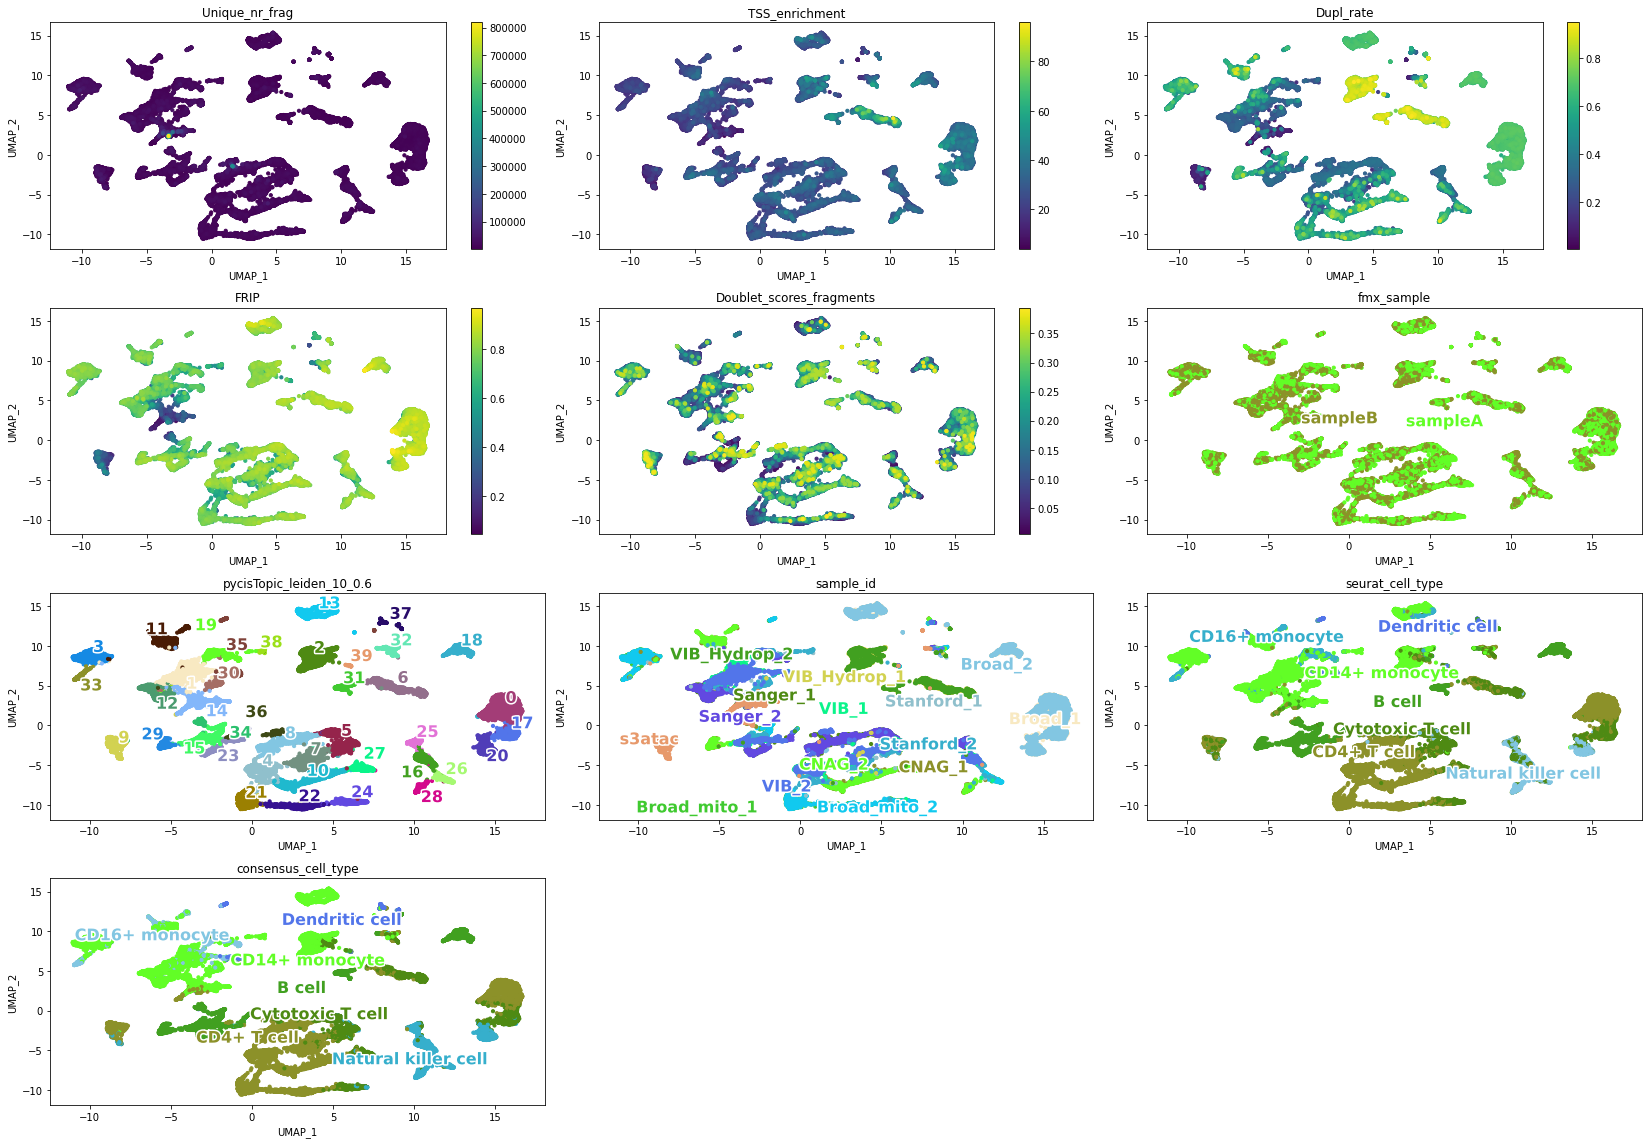

In [61]:
plot_metadata(cistopic_obj_dict['libds_merged'],
              reduction_name='UMAP',
              variables=['Unique_nr_frag', 'TSS_enrichment', 'Dupl_rate', 'FRIP',
                             'Doublet_scores_fragments', 'fmx_sample', 'pycisTopic_leiden_10_0.6', 'sample_id', 'seurat_cell_type', 'consensus_cell_type'],
              target='cell',
              num_columns=3,
              text_size=16,
              dot_size=10,
              figsize=(23,16),
             )

## Batch effect correction with Harmony

In [62]:
from pycisTopic.clust_vis import harmony

In [63]:
harmony(cistopic_obj_dict['libds_merged'],
        'sample_id',
        random_state=555,
        max_iter_harmony=20
       )

2021-10-25 14:11:40,861 - harmonypy - INFO - Iteration 1 of 20


2021-10-25 14:11:40,861 harmonypy    INFO     Iteration 1 of 20


2021-10-25 14:12:00,755 - harmonypy - INFO - Iteration 2 of 20


2021-10-25 14:12:00,755 harmonypy    INFO     Iteration 2 of 20


2021-10-25 14:12:20,541 - harmonypy - INFO - Iteration 3 of 20


2021-10-25 14:12:20,541 harmonypy    INFO     Iteration 3 of 20


2021-10-25 14:12:40,021 - harmonypy - INFO - Iteration 4 of 20


2021-10-25 14:12:40,021 harmonypy    INFO     Iteration 4 of 20


2021-10-25 14:12:58,613 - harmonypy - INFO - Iteration 5 of 20


2021-10-25 14:12:58,613 harmonypy    INFO     Iteration 5 of 20


2021-10-25 14:13:06,457 - harmonypy - INFO - Iteration 6 of 20


2021-10-25 14:13:06,457 harmonypy    INFO     Iteration 6 of 20


2021-10-25 14:13:13,876 - harmonypy - INFO - Iteration 7 of 20


2021-10-25 14:13:13,876 harmonypy    INFO     Iteration 7 of 20


2021-10-25 14:13:20,365 - harmonypy - INFO - Iteration 8 of 20


2021-10-25 14:13:20,365 harmonypy    INFO     Iteration 8 of 20


2021-10-25 14:13:27,425 - harmonypy - INFO - Iteration 9 of 20


2021-10-25 14:13:27,425 harmonypy    INFO     Iteration 9 of 20


2021-10-25 14:13:34,443 - harmonypy - INFO - Iteration 10 of 20


2021-10-25 14:13:34,443 harmonypy    INFO     Iteration 10 of 20


2021-10-25 14:13:41,014 - harmonypy - INFO - Iteration 11 of 20


2021-10-25 14:13:41,014 harmonypy    INFO     Iteration 11 of 20


2021-10-25 14:14:01,676 - harmonypy - INFO - Iteration 12 of 20


2021-10-25 14:14:01,676 harmonypy    INFO     Iteration 12 of 20


2021-10-25 14:14:08,835 - harmonypy - INFO - Converged after 12 iterations


2021-10-25 14:14:08,835 harmonypy    INFO     Converged after 12 iterations


In [64]:
run_umap(cistopic_obj_dict['libds_merged'], target = 'cell', reduction_name='UMAP_harmony', harmony=True)
#run_tsne(cistopic_obj_dict['merged'], target = 'cell', reduction_name='tSNE_harmony', harmony=True)

2021-10-25 14:14:08,866 cisTopic     INFO     Running UMAP


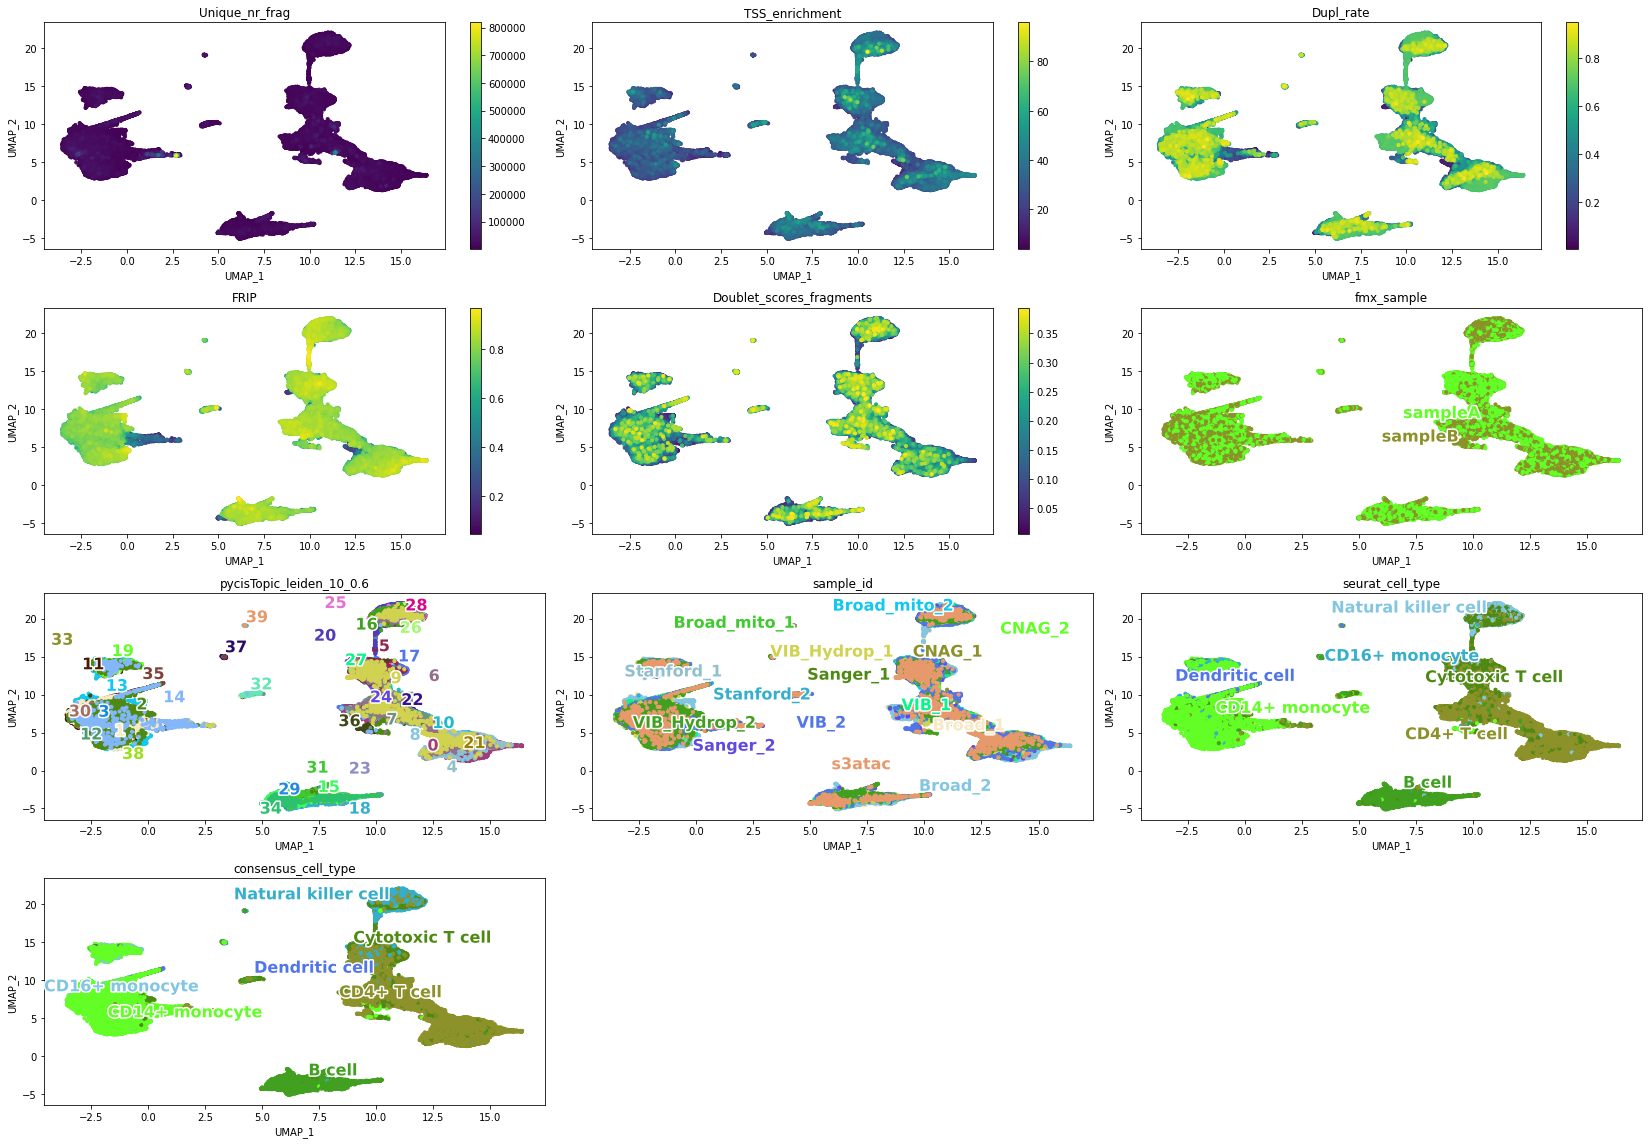

In [65]:
plot_metadata(cistopic_obj_dict['libds_merged'],
              reduction_name='UMAP_harmony',
              variables=['Unique_nr_frag', 'TSS_enrichment', 'Dupl_rate', 'FRIP',
                             'Doublet_scores_fragments', 'fmx_sample', 'pycisTopic_leiden_10_0.6', 'sample_id', 'seurat_cell_type', 'consensus_cell_type'],
              target='cell',
              num_columns=3,
              text_size=16,
              dot_size=10,
              figsize=(23,16),
             )

UMAP without batch effect correction


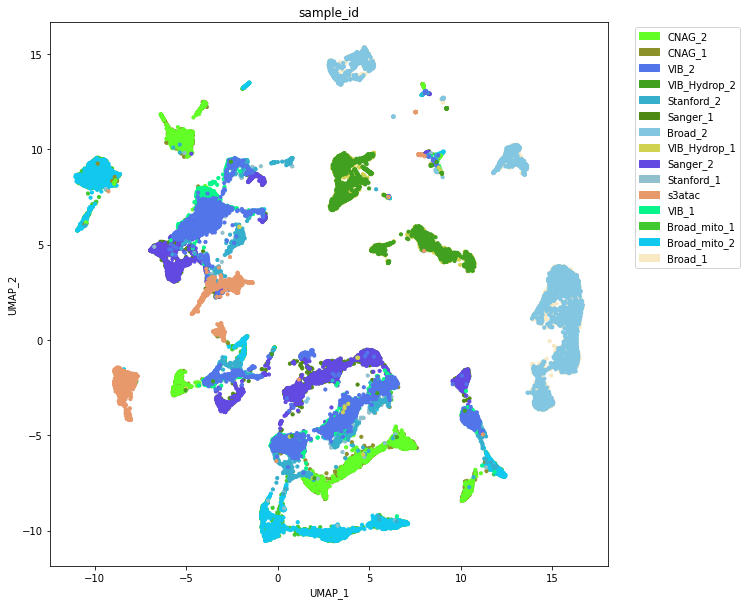

In [66]:
print("UMAP without batch effect correction")
plot_metadata(cistopic_obj_dict['libds_merged'],
              reduction_name='UMAP',
              variables=['sample_id'],
              target='cell',
              show_legend=True,
              show_label=False,
              num_columns=1,
              text_size=16,
              dot_size=10,
              figsize=(10,10),
             )

UMAP with batch effect correction


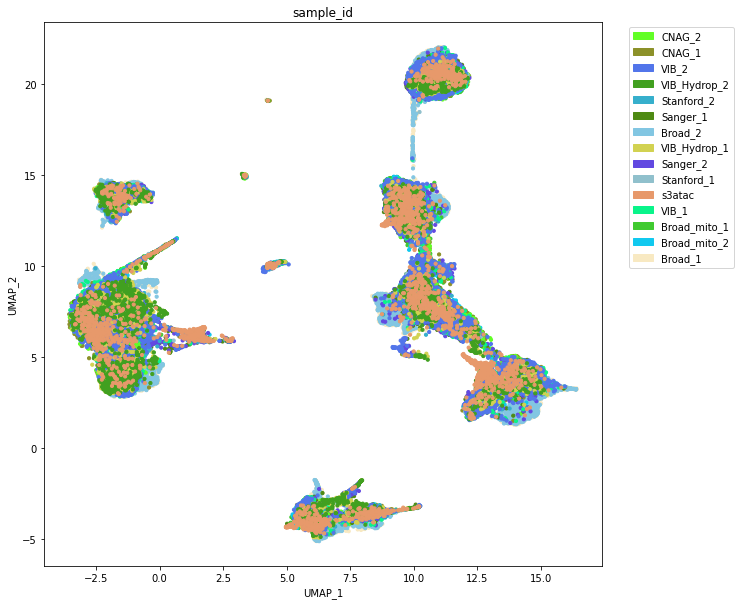

In [67]:
print("UMAP with batch effect correction")
plot_metadata(cistopic_obj_dict['libds_merged'],
              reduction_name='UMAP_harmony',
              variables=['sample_id'],
              target='cell',
              show_legend=True,
              show_label=False,
              num_columns=1,
              text_size=16,
              dot_size=10,
              figsize=(10,10),
             )

UMAP with batch effect correction


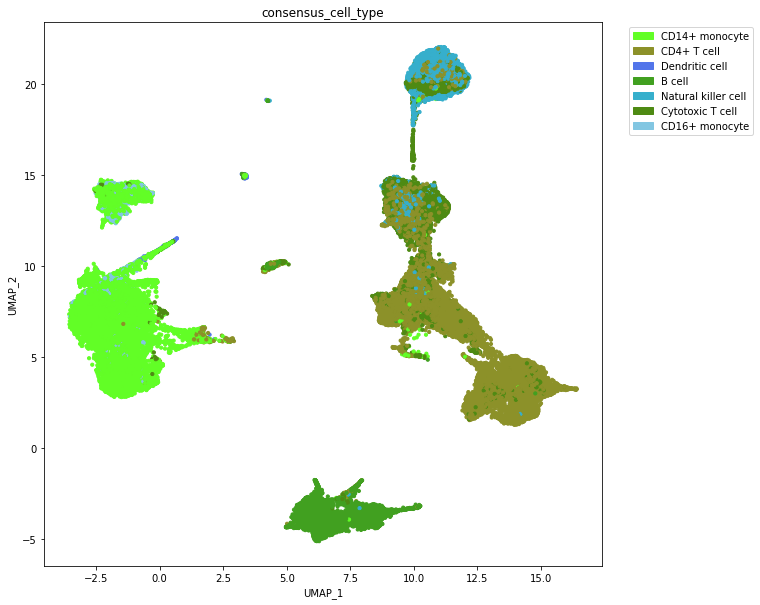

In [68]:
print("UMAP with batch effect correction")
plot_metadata(cistopic_obj_dict['libds_merged'],
              reduction_name='UMAP_harmony',
              variables=['consensus_cell_type'],
              target='cell',
              show_legend=True,
              show_label=False,
              num_columns=1,
              text_size=16,
              dot_size=10,
              figsize=(10,10),
             )

# save cto

In [75]:
key_list = ['libds_merged']
for key in key_list:
    f_out = os.path.join(wdir, f_cto_dir, key + '__cistopic_obj_filtered_models_annotated.pkl')
    if os.path.isfile(f_out):
        print(f"Skipping {key}, already exists")
        continue
    with open(f_out, 'wb') as f:
        pickle.dump(cistopic_obj_dict[key], f)
    
    print(f"Generated and saved filtered cistopic object for {key}")

Generated and saved filtered cistopic object for libds_merged


## Export pseudobulk profiles

In [77]:
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk, peak_calling
import pyranges as pr
import requests

In [78]:
# get chromosome sizes (hg38)
target_url = 'http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes'
chromsizes = pd.read_csv(target_url, sep='\t', header=None)
chromsizes.columns = ['Chromosome', 'End']
chromsizes['Start'] = [0]*chromsizes.shape[0]
chromsizes = chromsizes.loc[:,['Chromosome', 'Start', 'End']]
chromsizes = pr.PyRanges(chromsizes)
chromsizes

,Chromosome,Start,End
0,chr1,0,248956422
1,chr1_GL383518v1_alt,0,182439
2,chr1_GL383519v1_alt,0,110268
3,chr1_GL383520v2_alt,0,366580
4,chr1_KI270706v1_random,0,175055
...,...,...,...
450,chrX_KI270880v1_alt,0,284869
451,chrX_KI270881v1_alt,0,144206
452,chrX_KI270913v1_alt,0,274009
453,chrY,0,57227415


In [83]:
f_pseudo_dir = 'consensus_peak_calling'
if not os.path.exists(os.path.join(wdir, f_pseudo_dir)):
    os.makedirs(os.path.join(wdir, f_pseudo_dir))

# First, generate pseudobulk profiles

In [86]:
import ray
ray.shutdown()

In [88]:
bw_paths_dict = {}
bed_paths_dict = {}
for key in cistopic_obj_dict.keys():
    print(f"Starting {key}")
    f_dir = os.path.join(wdir, f_pseudo_dir, key)
    if not os.path.exists(f_dir):
        os.makedirs(f_dir)
    
    bw_paths, bed_paths = export_pseudobulk(
                #input_data = cistopic_obj_dict['merged'].cell_data,
                input_data = cistopic_obj_dict[key],
                variable = 'consensus_cell_type',
                sample_id_col = 'sample_id',
                chromsizes = chromsizes,
                bed_path = os.path.join(f_dir, 'pseudobulk_bed_files'),
                bigwig_path =  os.path.join(f_dir, 'pseudobulk_bw_files'),
                #path_to_fragments = fr_dict,
                n_cpu = 24,
                normalize_bigwig = True,
                remove_duplicates = True,
                )
    bw_paths_dict[key] = bw_paths.copy()
    bed_paths_dict[key] = bed_paths.copy()
#     if ray.is_initialized():
#         print("Shutting down Ray")
#         ray.shutdown()

Starting libds_merged
2021-10-25 14:50:44,070 cisTopic     INFO     Reading fragments from /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021_library_downsampled/atac_preprocess/multiplet_tagged/fragments/Broad_1.sinto.mm.fragments.tsv.gz
2021-10-25 14:52:31,081 cisTopic     INFO     Reading fragments from /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021_library_downsampled/atac_preprocess/multiplet_tagged/fragments/Broad_2.sinto.mm.fragments.tsv.gz
2021-10-25 14:54:04,863 cisTopic     INFO     Reading fragments from /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_mito_1.sinto.mm.fragments.tsv.gz
2021-10-25 14:54:50,408 cisTopic     INFO     Reading fragments from /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021_library_downsampled/atac_preprocess/multiplet_tagged/fragments/Broad_mito_2.si

2021-10-25 15:10:54,355	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


(pid=30101) 2021-10-25 15:11:09,463 cisTopic     INFO     Creating pseudobulk for Bcell
(pid=30091) 2021-10-25 15:11:16,789 cisTopic     INFO     Creating pseudobulk for CD14_monocyte
(pid=30094) 2021-10-25 15:11:23,170 cisTopic     INFO     Creating pseudobulk for CD16_monocyte
(pid=30090) 2021-10-25 15:11:29,624 cisTopic     INFO     Creating pseudobulk for CD4_Tcell
(pid=30097) 2021-10-25 15:11:35,720 cisTopic     INFO     Creating pseudobulk for CytotoxicTcell
(pid=30096) 2021-10-25 15:11:42,259 cisTopic     INFO     Creating pseudobulk for Dendriticcell
(pid=30096) 2021-10-25 15:13:16,931 cisTopic     INFO     Dendriticcell done!
(pid=30096) 2021-10-25 15:13:18,698 cisTopic     INFO     Creating pseudobulk for Naturalkillercell
(pid=30094) 2021-10-25 15:15:46,117 cisTopic     INFO     CD16_monocyte done!
(pid=30101) 2021-10-25 15:21:03,266 cisTopic     INFO     Bcell done!
(pid=30096) 2021-10-25 15:21:25,722 cisTopic     INFO     Naturalkillercell done!
(pid=30097) 2021-10-25 15:2

### Derive the consensus cell-type specific peaks
using bed files generated earlier

In [91]:
narrow_peaks_dict = {}

for key in cistopic_obj_dict.keys():
    print(f"Starting {key}")
    f_dir = os.path.join(wdir, f_pseudo_dir, key, 'macs2')
    if not os.path.exists(f_dir):
        os.makedirs(f_dir)

    # Run peak calling
    narrow_peaks_dict[key] = peak_calling('macs2',
                                     bed_paths_dict[key],
                                     f_dir,
                                     genome_size='hs',
                                     n_cpu=24,
                                     input_format='BEDPE',
                                     shift=73, 
                                     ext_size=146,
                                     keep_dup = 'all',
                                     q_value = 0.05,
                                     )

Starting libds_merged


2021-10-25 15:49:46,060	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


(pid=23797) 2021-10-25 15:49:53,690 cisTopic     INFO     Calling peaks for CD16_monocyte with macs2 callpeak --treatment /user/leuven/330/vsc33042/fderop/data/20211024_merged_analysis/consensus_peak_calling/libds_merged/pseudobulk_bed_files/CD16_monocyte.bed.gz --name CD16_monocyte  --outdir /user/leuven/330/vsc33042/fderop/data/20211024_merged_analysis/consensus_peak_calling/libds_merged/macs2 --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(pid=23788) 2021-10-25 15:49:53,879 cisTopic     INFO     Calling peaks for Dendriticcell with macs2 callpeak --treatment /user/leuven/330/vsc33042/fderop/data/20211024_merged_analysis/consensus_peak_calling/libds_merged/pseudobulk_bed_files/Dendriticcell.bed.gz --name Dendriticcell  --outdir /user/leuven/330/vsc33042/fderop/data/20211024_merged_analysis/consensus_peak_calling/libds_merged/macs2 --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup 

### Derive the consensus peaks
make a consensus from the consensus cell-type specific peaks

In [92]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks

In [96]:
#path_to_regions = '/staging/leuven/stg_00002/lcb/cbravo/SCREEN_ENCODE3/V2.hg38-rDHS-Unfiltered.blacklisted.bed'
path_to_blacklist = '/lustre1/project/stg_00002/lcb/fderop/data/20211013_hca_benchmark_libds/hg38_regions/hg38-blacklist.v2.bed'

In [97]:
peak_half_width = 250

# Get consensus peaks
consensus_peaks_dict = {}
for key in cistopic_obj_dict.keys():
    print(f"Starting {key}")
    f_dir = os.path.join(wdir, f_pseudo_dir, key)
    if not os.path.exists(f_dir):
        os.makedirs(f_dir)
        
    consensus_peaks_dict[key] = get_consensus_peaks(
        narrow_peaks_dict[key],
        peak_half_width,
        chromsizes = chromsizes,
        path_to_blacklist = path_to_blacklist
    )
    consensus_peaks_dict[key].to_bed(
        path=os.path.join(f_dir, key + '__consensus_regions.bed'),
        keep=True,
        compression='infer',
        chain=False
    )

Starting libds_merged
2021-10-25 17:05:05,560 cisTopic     INFO     Extending and merging peaks per class
2021-10-25 17:07:13,582 cisTopic     INFO     Normalizing peak scores
2021-10-25 17:07:14,204 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2021-10-25 17:08:59,998 cisTopic     INFO     Done!
